[`Conversion rates – you are (most likely) computing them wrong`](https://erikbern.com/2017/05/23/conversion-rates-you-are-most-likely-computing-them-wrong.html)

[國內投資機構退出率排行榜單](http://mini.eastday.com/bdmip/180224005021067.html)

[Step and jump lines](https://mp.weixin.qq.com/s/7C9zSEHkZJUYxGIxmuK0Vw)

[#TakeapartTuesday – Stepped Lines](https://learningtableaublog.wordpress.com/2018/02/12/takeaparttuesday-stepped-lines/)

[Lifelines Packages](https://github.com/CamDavidsonPilon/lifelines)

[Arthur Allignol and Aurelien Latouche](https://cran.r-project.org/web/views/Survival.html)

In [7]:
import lifelines
lifelines.__version__

'0.15.3'

`https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html`

> Another example is users subscribing to a service: a birth is a user who joins the service, and a death is when the user leaves the service. 

> The individuals in a population who have not been subject to the death event are labeled as right-censored, i.e., we did not (or can not) view the rest of their life history due to some external circumstances. All the information we have on these individuals are their current lifetime durations (which is naturally less than their actual lifetimes).

>Consider a case where the population is actually made up of two subpopulations, A and B. Population A has a very small lifespan, say 2 months on average, and population B enjoys a much larger lifespan, say 12 months on average. We may not know this distinction before hand. At t=10, we wish to investigate the average lifespan for everyone.

🚶`Walkthought`

⚕️[Estimating the Survival function using Kaplan-Meier](https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html)

In [8]:
import pandas as pd
from lifelines.datasets import load_dd

data = load_dd()

In [9]:
data.sample(6)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
464,Ecuador,130,130.0,South America,Americas,Rafael Correa,Rafael Correa.Ecuador.2007.2008.Presidential Dem,Democracy,Presidential Dem,2007,2,0
316,Colombia,100,100.0,South America,Americas,Alfonso Lopez Michelson,Alfonso Lopez Michelson.Colombia.1974.1977.Pre...,Democracy,Presidential Dem,1974,4,1
1357,Sao Tome and Principe,403,403.0,Middle Africa,Africa,Joaquim Rafael Branco,Joaquim Rafael Branco.Sao Tome and Principe.20...,Democracy,Mixed Dem,2008,1,0
376,Cuba,40,40.0,Caribbean,Americas,Raul Castro,Raul Castro.Cuba.2006.2008.Military Dict,Non-democracy,Military Dict,2006,3,0
1098,Nauru,970,970.0,Micronesia,Oceania,Rene Harris,Rene Harris.Nauru.2001.2003.Parliamentary Dem,Democracy,Parliamentary Dem,2001,3,1
646,Guatemala,90,90.0,Central America,Americas,Marco Vinicio Cerezo Arevalo,Marco Vinicio Cerezo Arevalo.Guatemala.1986.19...,Democracy,Presidential Dem,1986,5,1


In [12]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [13]:
T = data['duration']
E = data['observed']

kmf.fit(T,event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

Text(0.5,1,'Survival function of political regimes')

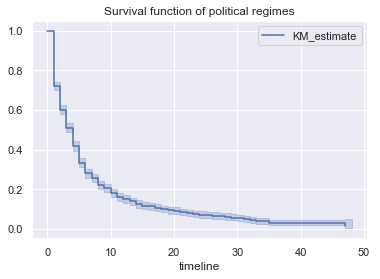

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# kmf.survival_function_.plot()
kmf.plot()
plt.title("Survival function of political regimes")

Median survival time of democratic: 3.0
Median survival time of non-democratic: 6.0


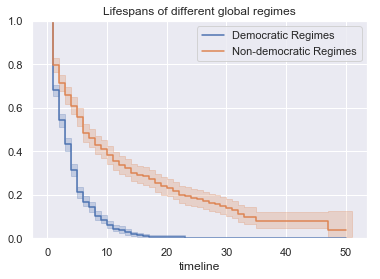

In [25]:
import numpy as np
ax = plt.subplot(111)

t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of democratic:", kmf.median_)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot(ax=ax)
print("Median survival time of non-democratic:", kmf.median_)

plt.ylim(0,1)
plt.title("Lifespans of different global regimes");

>It is incredible how much longer these non-democratic regimes exist for. A democratic regime does have a natural bias towards death though: both via elections and natural limits (the US imposes a strict eight-year limit). The median of a non-democratic is only about twice as large as a democratic regime, but the difference is apparent in the tails: if you’re a non-democratic leader, and you’ve made it past the 10 year mark, you probably have a long life ahead. Meanwhile, a democratic leader rarely makes it past ten years, and then have a very short lifetime past that.